# Predicting Player Activity Using Experience, Age, and Gender
### DSCI 100 Group Report

## Introduction

## Methods & Results

Our analysis consisted of four main stages:

1. **Data cleaning and wrangling**  
2. **Exploratory data analysis**  
3. **Model building and hyperparameter tuning**  
4. **Evaluation of model performance**

Each stage is described below and accompanied by relevant code and visualizations.


In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")
head(sessions)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


---
### Data Wrangling

In [3]:
player_data <- players |>
  rowwise() |>
  mutate(
      active = {
      this_email <- hashedEmail
      count_sessions <- nrow(filter(sessions, hashedEmail == this_email))
      if (count_sessions > 0) "Active" else "Inactive"}) |>
  ungroup() |>
  mutate(active = factor(active), gender = factor(gender), experience = factor(experience))

head(player_data)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,active
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<fct>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,Active
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,Active
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,Active
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,Active
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,Active
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,Inactive


In [4]:
player_data_2 <- player_data |>
    select(-subscribe, -name, -played_hours,-hashedEmail)
head(player_data_2)
dim(player_data_2)

experience,gender,Age,active
<fct>,<fct>,<dbl>,<fct>
Pro,Male,9,Active
Veteran,Male,17,Active
Veteran,Male,17,Active
Amateur,Female,21,Active
Regular,Male,21,Active
Amateur,Female,17,Inactive


[1] 196   4

We first loaded the players and sessions datasets and merged them using the hashed email identifier. We then created an `active` variable, defined as `"Active"` if the player appeared in the sessions table at least once, and `"Inactive"` otherwise.

Experience level, gender, and activity status were converted to factors. We selected only the variables required for modeling—experience, gender, age, and activity—ensuring the dataset was clean and ready for analysis.

The final dataset contained **196 players**, each represented by a unique demographic and experience profile.


In [5]:
summary <- player_data_2 |>
    summarize(age_mean=mean(Age,na.rm=TRUE), age_min=min(Age,na.rm=TRUE), age_max=max(Age,na.rm=TRUE))
summary

age_mean,age_min,age_max
<dbl>,<dbl>,<dbl>
21.13918,9,58


## Exploratory Data Analysis

To understand the structure of the dataset and identify potential relationships, we performed a series of exploratory analyses.

Summary statistics revealed that player ages ranged from *9 to 58*, with an average of approximately *21.1* years. Although the dataset spans multiple experience levels, the distribution of ages across experience groups appears overlapping, suggesting age may not be a strong predictor on its own.

### Visualization (Figures)

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


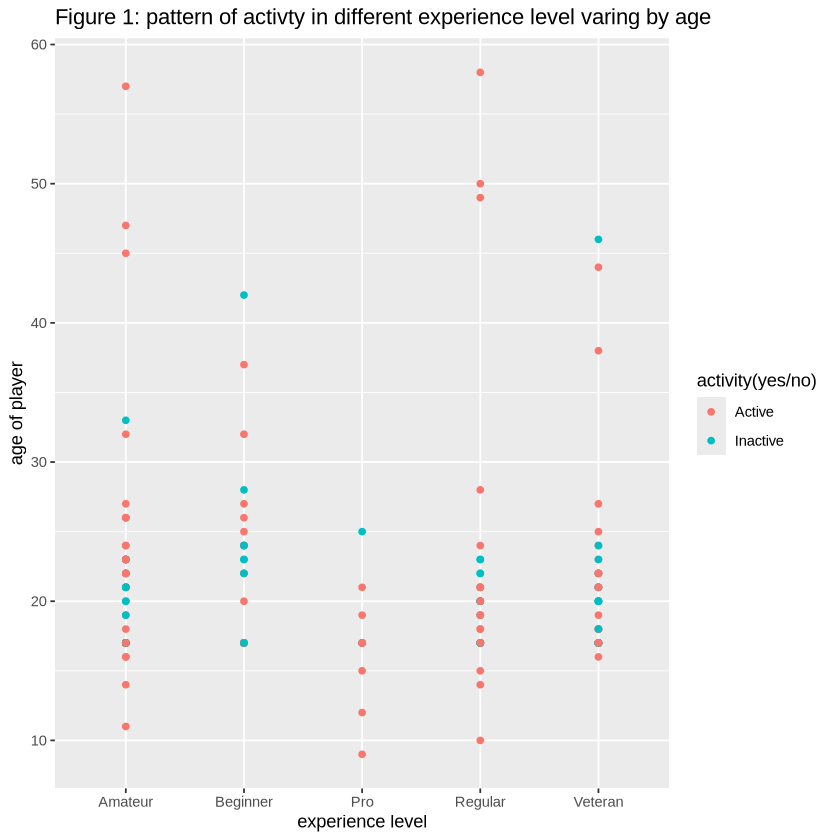

In [6]:
plot_1 <- player_data_2 |>
    ggplot(aes(x=experience, y=Age, color=active))+
    geom_point()+
    labs(x="experience level", y="age of player", color="activity(yes/no)")+
    ggtitle("Figure 1: pattern of activty in different experience level varing by age")
plot_1

Figure 1 shows how experience, age, and activity relate to each other. Active and inactive players appear at every experience level, and there isn’t a clear pattern where certain ages are more active than others. This suggests that age by itself doesn’t do a good job of predicting activity, so we need to consider multiple factors together.


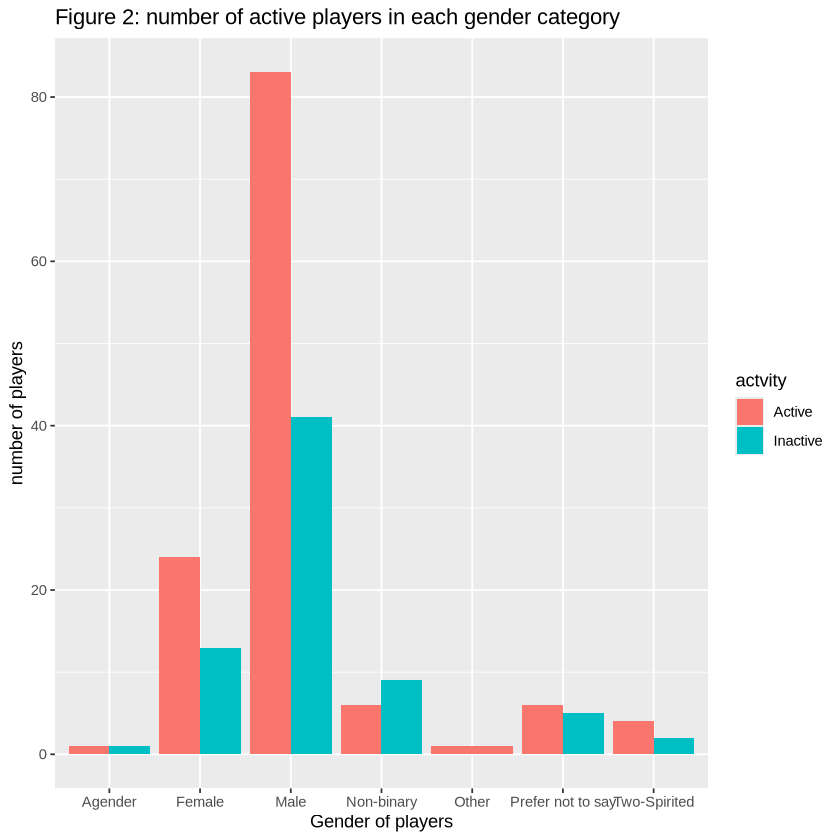

In [7]:
plot_2<- player_data_2 |>
    ggplot(aes(x=gender, fill=active))+
    geom_bar(position = "dodge") + 
    labs(x="Gender of players", y="number of players", fill="actvity") +
    ggtitle("Figure 2: number of active players in each gender category")
plot_2

Figure 2 illustrates the distribution of Active and Inactive players across genders. Although male players form the largest group, the proportion of Active vs. Inactive players appears relatively similar for all genders.

This suggests that **gender is unlikely to be a dominant predictor** of activity but may still contribute when combined with other variables.


## Classification Analysis

To determine whether experience, gender, and age can help predict whether a player becomes Active or Inactive, we trained a K-Nearest Neighbours (KNN) classification model.

We began by creating a recipe that specifies the model formula, using `active` as the response variable and `experience`, `gender`, and `Age` as predictors. We then defined a KNN model where the number of neighbours is treated as a tunable parameter using `neighbors = tune()`.

To evaluate which value of k works best, we used 5-fold cross-validation on the training data. Cross-validation splits the data into five parts, trains the model on four of them, and tests it on the remaining part. This process repeats so each fold is used for testing once, giving a more reliable estimate of model performance.

We tested k-values from 1 to 10 using a tuning grid. The `tune_grid()` function fit the model for each k across all folds and collected performance metrics. After tuning, we filtered the results to keep only the accuracy values, allowing us to compare how accuracy changes with different numbers of neighbours.

This process helps us identify the value of k that produces the highest accuracy and therefore the strongest overall model for predicting player activity.


In [8]:
set.seed(1)
data_split <- initial_split(player_data_2, prop = 0.75, strata=active)
training_data <- training(data_split)
testing_data <- testing(data_split)

In [9]:
recipe <- recipe(active ~experience+gender+Age, data=training_data)
knn_tune <- nearest_neighbor(weight_func="rectangular", neighbors=tune())|>
    set_engine("kknn")|>
    set_mode("classification")
vfold <- vfold_cv(training_data, v=5, strata=active) 
k_vals <- tibble(neighbors=seq(from=1, to=10, by=1))
knn_metric <- workflow()|>
    add_recipe(recipe)|>
    add_model(knn_tune)|>
    tune_grid(resample=vfold, grid=k_vals)|>
    collect_metrics()
accuracy <- knn_metric |>
    filter(.metric == "accuracy")
accuracy


→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 29 rows.
               ✖ Assigned data has 30 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 30 to size 29.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 27 rows.
               ✖ Assigned data has 28 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 28 to size 27.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5698413,3,0.04126984,Preprocessor1_Model01
2,accuracy,binary,0.5111111,3,0.04843221,Preprocessor1_Model02
3,accuracy,binary,0.5571429,3,0.01198386,Preprocessor1_Model03
4,accuracy,binary,0.5349206,3,0.02063492,Preprocessor1_Model04
5,accuracy,binary,0.5904762,3,0.03965078,Preprocessor1_Model05
6,accuracy,binary,0.6015873,3,0.03256871,Preprocessor1_Model06
7,accuracy,binary,0.5333333,3,0.01924501,Preprocessor1_Model07
8,accuracy,binary,0.5325397,3,0.03412698,Preprocessor1_Model08
9,accuracy,binary,0.5444444,3,0.02222222,Preprocessor1_Model09


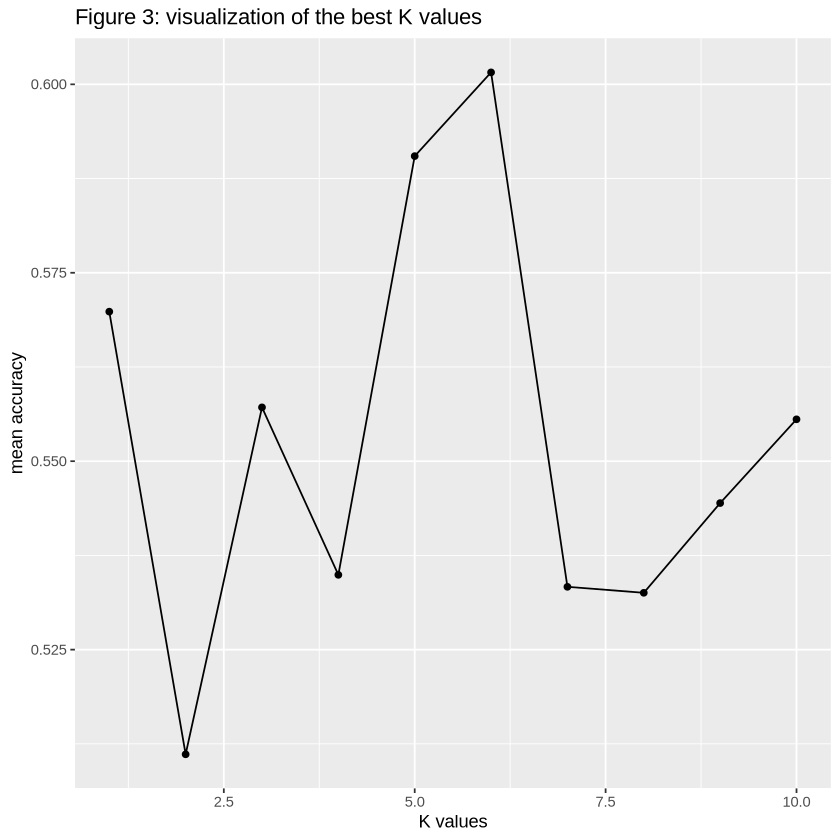

In [10]:
accuracy_plot <- accuracy |>
    ggplot(aes(x=neighbors, y=mean))+
    geom_point()+
    geom_line()+
    xlab("K values")+
    ylab("mean accuracy")+
    ggtitle("Figure 3: visualization of the best K values")
accuracy_plot

Figure 3 shows how accuracy changes as we adjust the number of neighbours. The model performs best around k = 6, suggesting that a moderate neighbourhood size works well for this dataset. This tuning step helps us avoid choosing a model that is too sensitive to noise (small k) or too generalized (large k).


In [11]:
knn_spec <- nearest_neighbor(weight_func="rectangular", neighbors=6)|>
    set_engine("kknn")|>
    set_mode("classification")
knn_fit <- workflow()|>
    add_recipe(recipe)|>
    add_model(knn_spec)|>
    fit(data=training_data)
prediction <- predict(knn_fit, testing_data)|>
    bind_cols(testing_data)
head(prediction)

.pred_class,experience,gender,Age,active
<fct>,<fct>,<fct>,<dbl>,<fct>
Active,Veteran,Male,17,Active
Active,Amateur,Female,21,Active
Inactive,Regular,Male,21,Active
Inactive,Veteran,Female,23,Active
Active,Pro,Male,17,Inactive
Active,Veteran,Non-binary,17,Inactive


In [12]:
confusion <- prediction |> 
conf_mat(truth =active, estimate = .pred_class)
confusion #do we want to keep this?

          Truth
Prediction Active Inactive
  Active       26       15
  Inactive      6        3

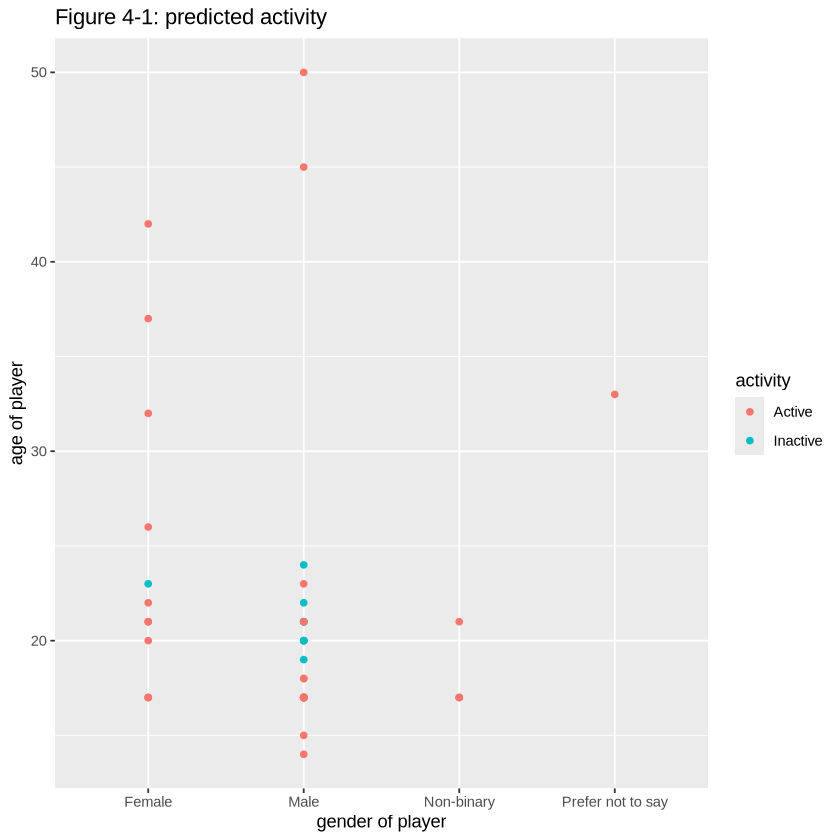

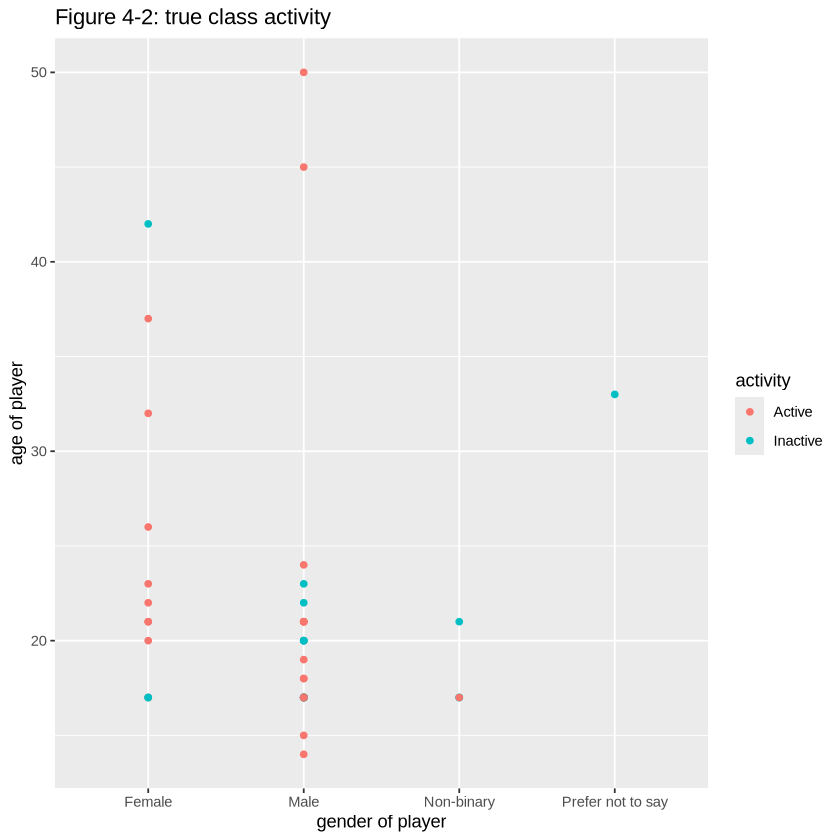

In [13]:
prediction_plot <- prediction |>
    ggplot(aes(x=gender, y=Age, color=.pred_class))+
    geom_point()+
    labs(x="gender of player", y="age of player", color="activity")+
    ggtitle("Figure 4-1: predicted activity")
test_true_plot <- testing_data |>
    ggplot(aes(x=gender, y=Age, color=active))+
    geom_point()+
    labs(x="gender of player", y="age of player", color="activity")+
    ggtitle("Figure 4-2: true class activity")

prediction_plot
test_true_plot

In [14]:
result_accuracy <- prediction |>
    metrics(truth=active, estimate=.pred_class)|>
    filter(.metric=="accuracy")
pull(result_accuracy, .estimate)

[1] 0.58

In [15]:
precision <- prediction |> 
precision(truth = active, estimate = .pred_class, event_level = "first") 
pull(precision, .estimate)

[1] 0.6341463

In [16]:
recall <- prediction |> recall(truth = active, estimate = .pred_class, event_level = "first")
pull(recall, .estimate)

[1] 0.8125